## Hopfield Networks

[Neural networks and physical systems with emergent collective computationalabilities](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC346238/pdf/pnas00447-0135.pdf) (1982)

This is a implementation of a Hopfield network, a type of recurrent artificial neural network that can store and recall patterns. The network can be trained on a set of input patterns and later be used to recall these patterns.

In [1]:
from nn import hopfield

import os, requests, gzip, hashlib

import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)

In [3]:
def fetch(url):
    filepath = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(filepath):
        with open(filepath, 'rb') as f:
            data = f.read()
    else:
        with open(filepath, 'wb') as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

In [4]:
data = fetch('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')[0x10:]
data = data.reshape((-1, 784)) # 60,000 x 784
data = data / 255.0

print(data.shape)

(60000, 784)


In [5]:
# Build model
neurons = data.shape[1]
model = hopfield(neurons)

In [6]:
# Summary
w = int((neurons * (neurons - 1)) / 2)

print(neurons, "neurons")
print(w, "weighted connections")
print(f"{neurons * 0.138:.2f} point attactors")
print(f"{0.24 * w:.2f} bit capacity")

784 neurons
306936 weighted connections
108.19 point attactors
73664.64 bit capacity


In [7]:
# Train
samples = 2
model.train(data[:samples])

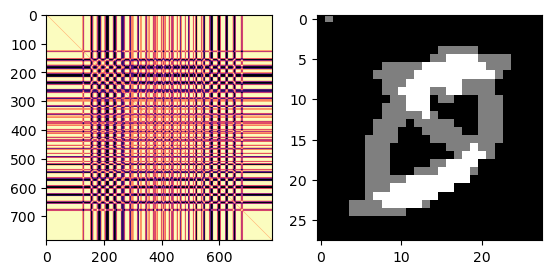

In [8]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(model.weights, cmap='magma')

plt.subplot(1,2,2)
plt.imshow(model.weights[1].reshape(28,28), cmap='binary')

In [9]:
state = np.random.randint(-1,2,(model.ndim)) # Noise

# state = data[0]
# state[:350] = 0

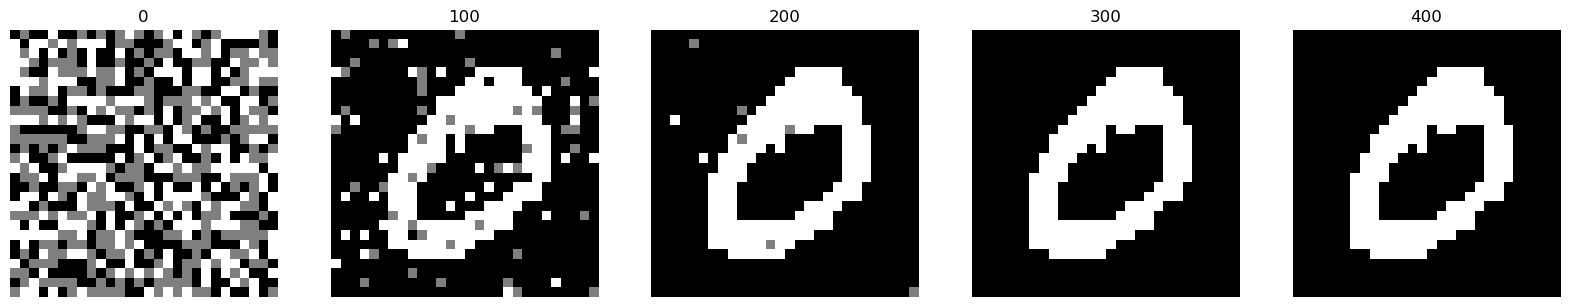

In [10]:
# Infer
steps = 500
n_update = 16
energy = []

plt.figure(figsize=(20,200))
for i in range(steps):
    state = model.infer(state, n_update)
    E = model.compute_energy(state)
    energy.append(E)

    stamp = 100
    if i%stamp == 0:
        m = int((i/stamp)+1)
        plt.subplot(1, int(steps/stamp), m)
        plt.imshow(state.reshape(28,28), cmap='binary')
        plt.title(i)
        plt.axis('off')

(Text(0.5, 0, 'Time'), Text(0, 0.5, 'Energy'))

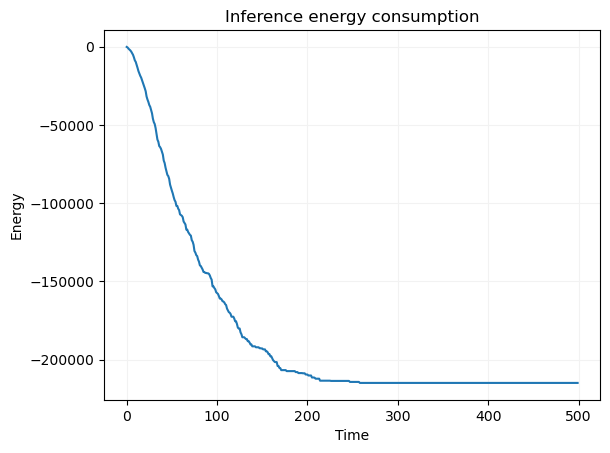

In [11]:
x = np.arange(len(energy))
y = np.array(energy).squeeze()

plt.figure()
plt.plot(x, y)
plt.grid(axis='both', color='0.95')
plt.title('Inference energy consumption')
plt.xlabel('Time'), plt.ylabel('Energy')